# Modèle SVM pour la reconnaissance de chiffres manuscrits

Ce notebook implémente un pipeline pour entraîner un modèle SVM sur le dataset MNIST et effectuer des prédictions.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pickle
import numpy as np

# ancien model

# new model

Modèle pour la classe 0 entraîné.
Modèle pour la classe 1 entraîné.
Modèle pour la classe 2 entraîné.
Modèle pour la classe 3 entraîné.
Modèle pour la classe 4 entraîné.
Modèle pour la classe 5 entraîné.
Modèle pour la classe 6 entraîné.
Modèle pour la classe 7 entraîné.
Modèle pour la classe 8 entraîné.
Modèle pour la classe 9 entraîné.
Accuracy sur les données de test : 91.30%

Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.94      0.97      0.95       120
           2       0.91      0.88      0.89        90
           3       0.91      0.87      0.89       102
           4       0.91      0.92      0.92       103
           5       0.90      0.88      0.89        84
           6       0.96      0.93      0.95       106
           7       0.83      0.92      0.87       120
           8       0.96      0.86      0.91        85
           9       0.86      0.90      0.88        8

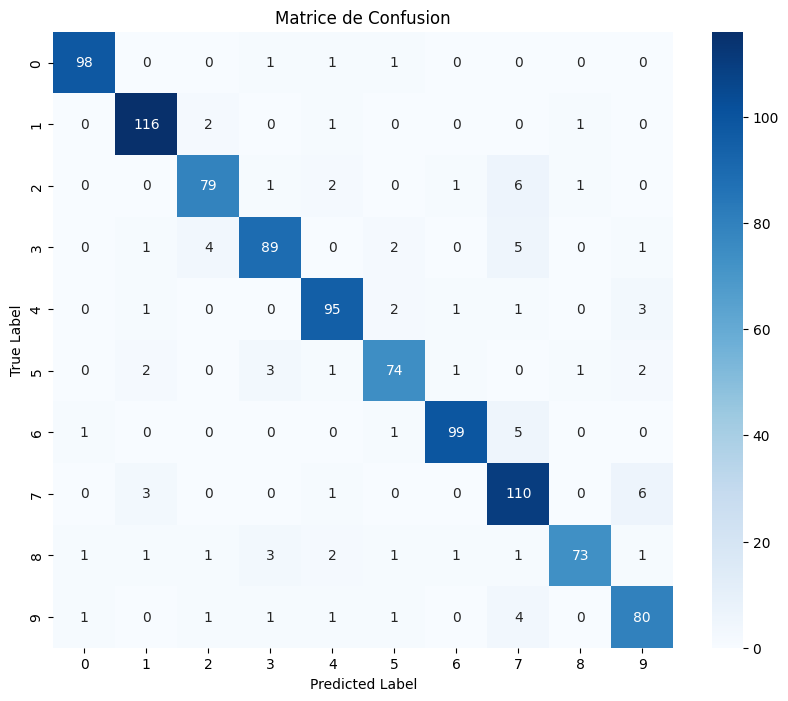

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

X = X[:5000]
y = y[:5000]

from sklearn.model_selection import train_test_split
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner les modèles One-vs-All
svm_models = []
for i in range(10):
    y_binary = np.where(y_train == i, 1, -1)  # Binariser les labels pour chaque classe
    model = SVC(kernel='rbf', C=1.0, gamma=0.001)
    model.fit(X_train, y_binary)
    svm_models.append(model)
    print(f"Modèle pour la classe {i} entraîné.")

# Fonction de prédiction One-vs-All
def predict_ova(models, X):
    decision_values = np.array([model.decision_function(X) for model in models])
    return np.argmax(decision_values, axis=0)

# Faire des prédictions sur les données de test
y_pred = predict_ova(svm_models, X_test)

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur les données de test : {accuracy * 100:.2f}%")

# Rapport détaillé
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")
print(conf_matrix)
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion')
plt.show()


## test des hyper paramètres :

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Définir la grille d'hyperparamètres
param_grid = {
    'C': [0.1, 1, 10, 100],  # Paramètre de régularisation
    'gamma': [0.001, 0.01, 0.1, 1],  # Paramètre du noyau RBF
    'kernel': ['rbf']
}

# Configurer le modèle SVM avec GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='accuracy',  # Évaluer la précision
    cv=3,  # Validation croisée à 3 plis
    verbose=1,
    n_jobs=-1  # Utilise tous les cœurs disponibles
)

# Ajuster le modèle sur les données
grid_search.fit(X_train, y_train)

# Résultats de la recherche
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)

# Évaluer le modèle optimal
best_model = grid_search.best_estimator_
y_predm = best_model.predict(X)
print(classification_report(y, y_predm))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Meilleurs paramètres trouvés : {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Meilleure précision : 0.918996990626967
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       479
           1       0.00      0.00      0.00       563
           2       0.00      0.00      0.00       488
           3       0.00      0.00      0.00       493
           4       0.00      0.00      0.00       535
           5       0.00      0.00      0.00       434
           6       0.00      0.00      0.00       501
           7       0.11      1.00      0.20       550
           8       0.00      0.00      0.00       462
           9       0.00      0.00      0.00       495

    accuracy                           0.11      5000
   macro avg       0.01      0.10      0.02      5000
weighted avg       0.01      0.11      0.02      5000



/Users/raniabouzroud/Desktop/analyse et visualisation de données/venv_global/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raniabouzroud/Desktop/analyse et visualisation de données/venv_global/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raniabouzroud/Desktop/analyse et visualisation de données/venv_global/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with

In [ ]:
# Récupérer les paramètres de chaque modèle SVM
for i, model in enumerate(svm_models):
    # Vecteurs supports
    support_vectors = model.support_vectors_
    
    # Coefficients associés aux vecteurs supports
    dual_coefficients = model.dual_coef_
    
    # Biais
    intercept = model.intercept_
    
    # Afficher les informations
    print(f"Classe {i} :")
    print(f" - Nombre de vecteurs supports : {support_vectors.shape[0]}")
    print(f" - Dual coefficients (shape): {dual_coefficients.shape}")
    print(f" - Biais : {intercept[0]}")
    print("===================================")
    



Classe 0 :
 - Nombre de vecteurs supports : 331
 - Dual coefficients (shape): (1, 331)
 - Biais : -1.1017537189943152
Classe 1 :
 - Nombre de vecteurs supports : 293
 - Dual coefficients (shape): (1, 293)
 - Biais : -1.0087010624987571
Classe 2 :
 - Nombre de vecteurs supports : 693
 - Dual coefficients (shape): (1, 693)
 - Biais : -0.715824662205631
Classe 3 :
 - Nombre de vecteurs supports : 660
 - Dual coefficients (shape): (1, 660)
 - Biais : -0.7398576546794192
Classe 4 :
 - Nombre de vecteurs supports : 637
 - Dual coefficients (shape): (1, 637)
 - Biais : -0.9541590146120092
Classe 5 :
 - Nombre de vecteurs supports : 688
 - Dual coefficients (shape): (1, 688)
 - Biais : -0.8290759496278781
Classe 6 :
 - Nombre de vecteurs supports : 492
 - Dual coefficients (shape): (1, 492)
 - Biais : -0.7200174173359326
Classe 7 :
 - Nombre de vecteurs supports : 603
 - Dual coefficients (shape): (1, 603)
 - Biais : -0.6055321553614817
Classe 8 :
 - Nombre de vecteurs supports : 687
 - Dual c

## exporter les infos sous format json 

In [7]:
import json

# Préparer une liste pour stocker les informations de chaque modèle
models_info = []

for i,model in enumerate(svm_models):
    # Récupérer les paramètres
    support_vectors = model.support_vectors_
    dual_coefficients = model.dual_coef_
    intercept = model.intercept_
    
    # Stocker les informations dans un dictionnaire
    model_data = {
        "class": i,  # Classe cible pour ce modèle
        "vecteur_support": support_vectors.tolist(),  # Convertir en liste pour JSON
        "coefficients": dual_coefficients.tolist(),  # Convertir en liste pour JSON
        "biais": intercept.tolist()  # Convertir en liste pour JSON
    }
    
    # Ajouter ce modèle à la liste
    models_info.append(model_data)

# Sauvegarder dans un fichier JSON
with open("svm_models.json", "w") as json_file:
    json.dump(models_info, json_file, indent=4)

print("Paramètres des modèles SVM sauvegardés dans 'svm_models.json'")


Paramètres des modèles SVM sauvegardés dans 'svm_models.json'


In [16]:
# Exemples pour vérifier les prédictions
test_samples = X_test[:5]
test_labels = X_test[:5]
print(test_samples)

predictions = predict_ova(svm_models, test_samples)
print("Exemples pour vérification :")
for i, (input_vector, true_label, pred_label) in enumerate(zip(test_samples, test_labels, predictions)):
    print(f"Exemple {i + 1} :")
    print(f" - Label réel : {true_label}")
    print(f" - Prédiction : {pred_label}")
    print(f" - Vecteur d'entrée (taille réduite) : {input_vector[:5]}...\n")


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Exemples pour vérification :
Exemple 1 :
 - Label réel : [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01581337
 -0.01581337 -0.01581337 -0.02393238 -0.02642077 -0.02737953 -0.02798903
 -0.02714603 -0.02663018 -0.02733483 -0.02481658 -0.0170676  -0.02236553
 -0.01732166 -0.0193075  -0.01581337  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.02304927 -0.02831934 -0.03772046
 -0.05346583 -0.06018301 -0.07746794 -0.09578369 -0.11944285 -0.132715

## exporter le fichier sous format pickle

In [17]:
import pickle

# Créer une structure pour sauvegarder les informations de chaque modèle
svm_params = {}

# Parcourir les modèles et extraire les paramètres
for i, model in enumerate(svm_models):
    svm_params[f"class_{i}"] = {
        "support_vectors": model.support_vectors_,
        "dual_coefficients": model.dual_coef_,
        "bias": model.intercept_,
    }

# Sauvegarder les paramètres dans un fichier pickle
with open("svm_models_params.pkl", "wb") as f:
    pickle.dump(svm_params, f)

print("Paramètres des modèles SVM sauvegardés dans 'svm_models_params.pkl'.")


Paramètres des modèles SVM sauvegardés dans 'svm_models_params.pkl'.


In [7]:
import json

# Vérifier le nombre de modèles
print(f"Nombre de modèles SVM dans svm_models : {len(svm_models)}")

# Préparer une liste pour stocker les informations de chaque modèle
models_info = []

for i, model in enumerate(svm_models):
    try:
        # Récupérer les paramètres
        support_vectors = model.support_vectors_
        dual_coefficients = model.dual_coef_
        intercept = model.intercept_
        
        # Stocker les informations dans un dictionnaire
        model_data = {
            "class": i,  # Classe cible pour ce modèle
            "vecteur_support": support_vectors.tolist(),  # Convertir en liste pour JSON
            "coefficients": dual_coefficients.tolist(),  # Convertir en liste pour JSON
            "biais": intercept.tolist()  # Convertir en liste pour JSON
        }
        
        # Ajouter ce modèle à la liste
        models_info.append(model_data)
        print(f"Modèle {i} sauvegardé.")
    except AttributeError as e:
        print(f"Erreur sur le modèle {i}: {e}")

# Sauvegarder dans un fichier JSON
with open("svm_models.json", "w") as json_file:
    json.dump(models_info, json_file, indent=4)

print("Paramètres des modèles SVM sauvegardés dans 'svm_models.json'")


Nombre de modèles SVM dans svm_models : 10
Modèle 0 sauvegardé.
Modèle 1 sauvegardé.
Modèle 2 sauvegardé.
Modèle 3 sauvegardé.
Modèle 4 sauvegardé.
Modèle 5 sauvegardé.
Modèle 6 sauvegardé.
Modèle 7 sauvegardé.
Modèle 8 sauvegardé.
Modèle 9 sauvegardé.
Paramètres des modèles SVM sauvegardés dans 'svm_models.json'
